# Candlestick Upside/Downside Gap Three Methods

https://www.investopedia.com/terms/u/upsidedownside-gap-three-methods.asp

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import talib

import warnings
warnings.filterwarnings("ignore")

# yahoo finance is used to fetch data 
import yfinance as yf
yf.pdr_override()

In [2]:
# input
symbol = 'AMSF'
start = '2020-01-01'
end = '2021-10-22'

# Read data 
df = yf.download(symbol,start,end)

# View Columns
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,66.260002,66.279999,65.230003,66.239998,60.483650,47900
2020-01-03,65.699997,66.720001,65.269997,66.360001,60.593235,89100
2020-01-06,66.150002,66.610001,65.279999,66.139999,60.392353,64600
2020-01-07,65.989998,66.559998,65.209999,65.470001,59.780567,72400
2020-01-08,65.519997,65.559998,64.339996,64.820000,59.187057,135200


## Candlestick with Upside/Downside Gap Three Methods

In [3]:
from matplotlib import dates as mdates
import datetime as dt

dfc = df.copy()
dfc['VolumePositive'] = dfc['Open'] < dfc['Adj Close']
#dfc = dfc.dropna()
dfc = dfc.reset_index()
dfc['Date'] = pd.to_datetime(dfc['Date'])
dfc['Date'] = dfc['Date'].apply(mdates.date2num)
dfc.head()

,Date,Open,High,Low,Close,Adj Close,Volume,VolumePositive
0,737426.0,66.260002,66.279999,65.230003,66.239998,60.483650,47900,False
1,737427.0,65.699997,66.720001,65.269997,66.360001,60.593235,89100,False
2,737430.0,66.150002,66.610001,65.279999,66.139999,60.392353,64600,False
3,737431.0,65.989998,66.559998,65.209999,65.470001,59.780567,72400,False
4,737432.0,65.519997,65.559998,64.339996,64.820000,59.187057,135200,False


Text(0, 0.5, 'Price')

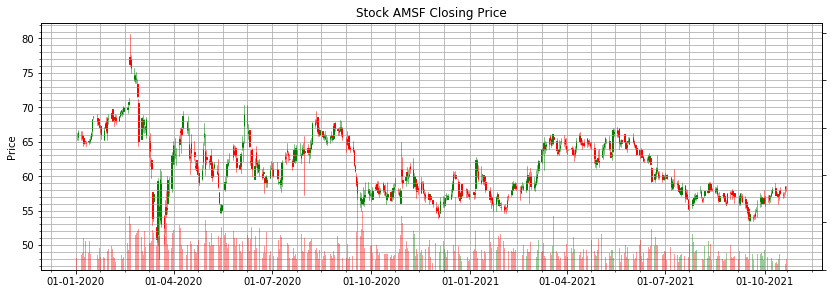

In [4]:
from mplfinance.original_flavor import candlestick_ohlc

fig = plt.figure(figsize=(14,10))
ax = plt.subplot(2, 1, 1)
candlestick_ohlc(ax,dfc.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax.grid(True, which='both')
ax.minorticks_on()
axv = ax.twinx()
colors = dfc.VolumePositive.map({True: 'g', False: 'r'})
axv.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
axv.axes.yaxis.set_ticklabels([])
axv.set_ylim(0, 3*df.Volume.max())
ax.set_title('Stock '+ symbol +' Closing Price')
ax.set_ylabel('Price')

In [5]:
gap_three_methods = talib.CDLXSIDEGAP3METHODS(df['Open'], df['High'], df['Low'], df['Close'])

gap_three_methods = gap_three_methods[gap_three_methods != 0]

In [6]:
df['gap_three_methods'] = talib.CDLXSIDEGAP3METHODS(df['Open'], df['High'], df['Low'], df['Close'])

In [7]:
df.loc[df['gap_three_methods'] !=0]

,Open,High,Low,Close,Adj Close,Volume,gap_three_methods
Date,,,,,,,
2020-07-01,61.110001,61.889999,60.049999,60.07,55.325546,71800,100
2020-12-23,56.759998,57.810001,56.759998,57.59,56.780239,57400,-100


In [8]:
df['Adj Close'].loc[df['gap_three_methods'] !=0]

Date
2020-07-01    55.325546
2020-12-23    56.780239
Name: Adj Close, dtype: float64

In [9]:
df['gap_three_methods'].loc[df['gap_three_methods'] !=0].index

DatetimeIndex(['2020-07-01', '2020-12-23'], dtype='datetime64[ns]', name='Date', freq=None)

In [10]:
gap_three_methods

Date
2020-07-01    100
2020-12-23   -100
dtype: int32

In [11]:
gap_three_methods.index

DatetimeIndex(['2020-07-01', '2020-12-23'], dtype='datetime64[ns]', name='Date', freq=None)

In [12]:
df

,Open,High,Low,Close,Adj Close,Volume,gap_three_methods
Date,,,,,,,
2020-01-02,66.260002,66.279999,65.230003,66.239998,60.483650,47900,0
2020-01-03,65.699997,66.720001,65.269997,66.360001,60.593235,89100,0
2020-01-06,66.150002,66.610001,65.279999,66.139999,60.392353,64600,0
2020-01-07,65.989998,66.559998,65.209999,65.470001,59.780567,72400,0
2020-01-08,65.519997,65.559998,64.339996,64.820000,59.187057,135200,0
...,...,...,...,...,...,...,...
2021-10-15,57.980000,58.459999,57.400002,57.509998,57.509998,68600,0
2021-10-18,57.389999,57.680000,56.860001,57.259998,57.259998,35800,0
2021-10-19,57.610001,57.660000,56.919998,57.509998,57.509998,31200,0


Text(0, 0.5, 'Price')

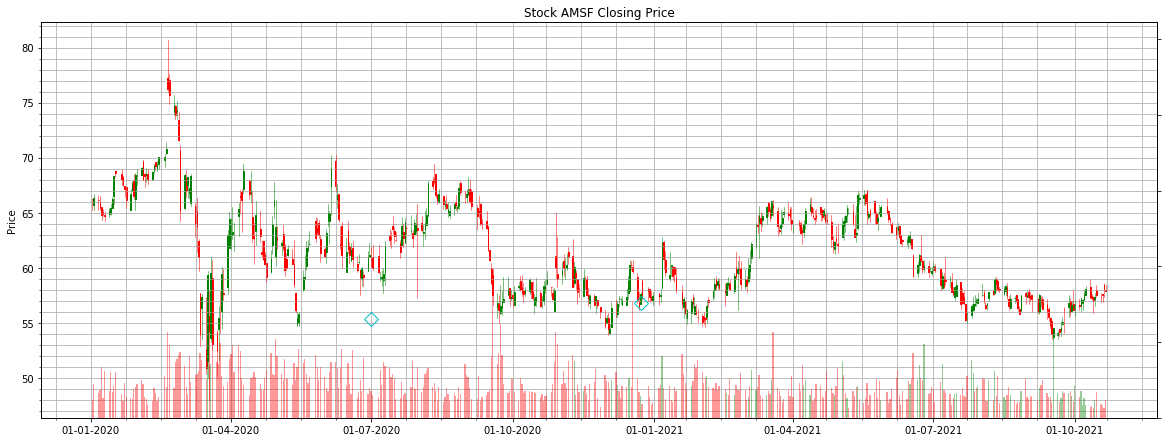

In [13]:
fig = plt.figure(figsize=(20,16))
ax = plt.subplot(2, 1, 1)
candlestick_ohlc(ax,dfc.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax.grid(True, which='both')
ax.minorticks_on()
axv = ax.twinx()
ax.plot_date(df['Adj Close'].loc[df['gap_three_methods'] !=0].index, df['Adj Close'].loc[df['gap_three_methods'] !=0],
                'Dc', # marker style 'o', color 'g'
                fillstyle='none', # circle is not filled (with color)
                ms=10.0) 
colors = dfc.VolumePositive.map({True: 'g', False: 'r'})
axv.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
axv.axes.yaxis.set_ticklabels([])
axv.set_ylim(0, 3*df.Volume.max())
ax.set_title('Stock '+ symbol +' Closing Price')
ax.set_ylabel('Price')

## Plot Certain dates

In [14]:
df = df['2020-12-01':'2021-01-01']
dfc = df.copy()
dfc['VolumePositive'] = dfc['Open'] < dfc['Adj Close']
#dfc = dfc.dropna()
dfc = dfc.reset_index()
dfc['Date'] = pd.to_datetime(dfc['Date'])
dfc['Date'] = dfc['Date'].apply(mdates.date2num)
dfc.head()

,Date,Open,High,Low,Close,Adj Close,Volume,gap_three_methods,VolumePositive
0,737760.0,54.980000,55.720001,54.980000,55.410000,54.360096,96800,0,False
1,737761.0,55.480000,55.869999,53.900002,54.470001,53.437912,95200,0,False
2,737762.0,54.130001,54.939999,54.000000,54.470001,53.704113,73600,0,False
3,737763.0,54.610001,56.930000,54.610001,56.320000,55.528099,98600,0,True
4,737766.0,56.259998,57.040001,55.570000,56.150002,55.360493,121900,0,False


Text(0, 0.5, 'Price')

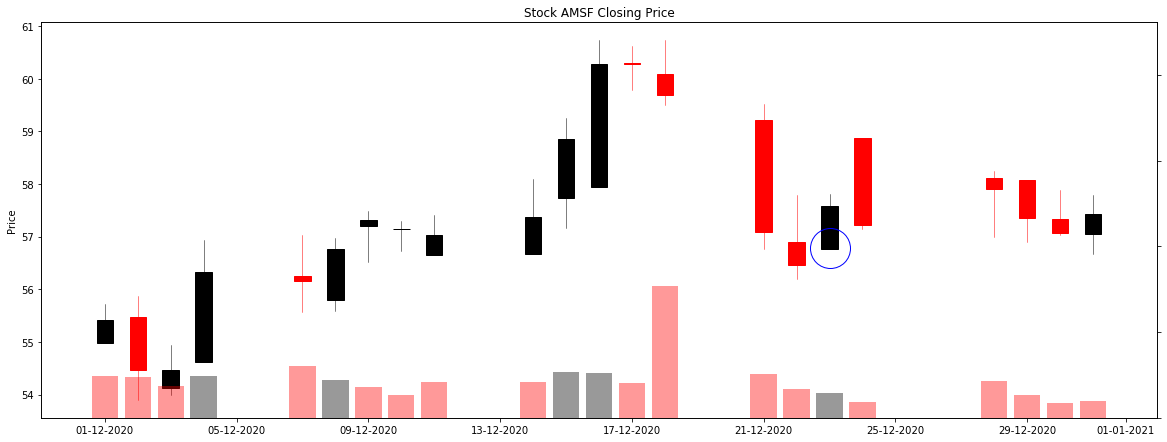

In [15]:
fig = plt.figure(figsize=(20,16))
ax = plt.subplot(2, 1, 1)
ax.set_facecolor('white')
candlestick_ohlc(ax,dfc.values, width=0.5, colorup='black', colordown='red', alpha=1.0)
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
#ax.grid(True, which='both')
#ax.minorticks_on()
axv = ax.twinx()
ax.plot_date(df['Adj Close'].loc[df['gap_three_methods'] !=0].index, df['Adj Close'].loc[df['gap_three_methods'] !=0],
                'ob', # marker style 'o', color 'g'
                fillstyle='none', # circle is not filled (with color)
                ms=40.0) 
colors = dfc.VolumePositive.map({True: 'black', False: 'red'})
axv.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
axv.axes.yaxis.set_ticklabels([])
axv.set_ylim(0, 3*df.Volume.max())
ax.set_title('Stock '+ symbol +' Closing Price')
ax.set_ylabel('Price')

# Highlight Candlestick

Text(0, 0.5, 'Price')

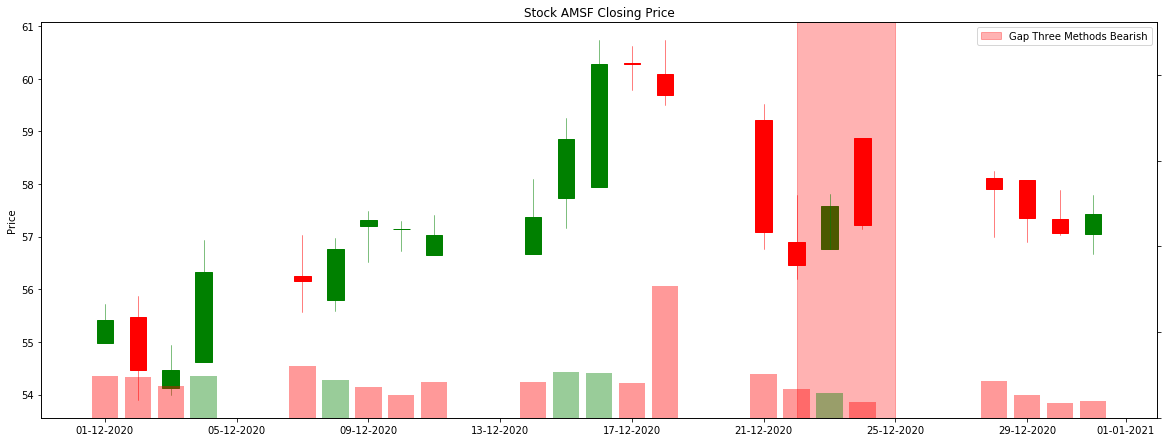

In [16]:
from matplotlib.dates import date2num
from datetime import datetime

fig = plt.figure(figsize=(20,16))
ax = plt.subplot(2, 1, 1)
candlestick_ohlc(ax,dfc.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
#ax.grid(True, which='both')
#ax.minorticks_on()
axv = ax.twinx()
ax.axvspan(date2num(datetime(2020,12,22)), date2num(datetime(2020,12,25)), 
           label="Gap Three Methods Bearish",color="red", alpha=0.3)
ax.legend()
colors = dfc.VolumePositive.map({True: 'g', False: 'r'})
axv.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
axv.axes.yaxis.set_ticklabels([])
axv.set_ylim(0, 3*df.Volume.max())
ax.set_title('Stock '+ symbol +' Closing Price')
ax.set_ylabel('Price')